In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as snb


In [49]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [51]:
data = pd.read_csv("Heart_Disease .csv")
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [52]:
data.replace('?',np.nan,inplace=True)
data.isnull().any()

data = data.astype(float)
data = data.apply(pd.to_numeric, errors='coerce')


data = data.dropna()
data = data.fillna(data.mean())


In [53]:
X = data.iloc[:,0:13]
Y = data.iloc[:,13]

In [54]:
data = pd.get_dummies(X,columns=['ca','thal','restecg','slope'])

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
clt = DecisionTreeClassifier(criterion='gini',random_state=42)
clt.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=42)

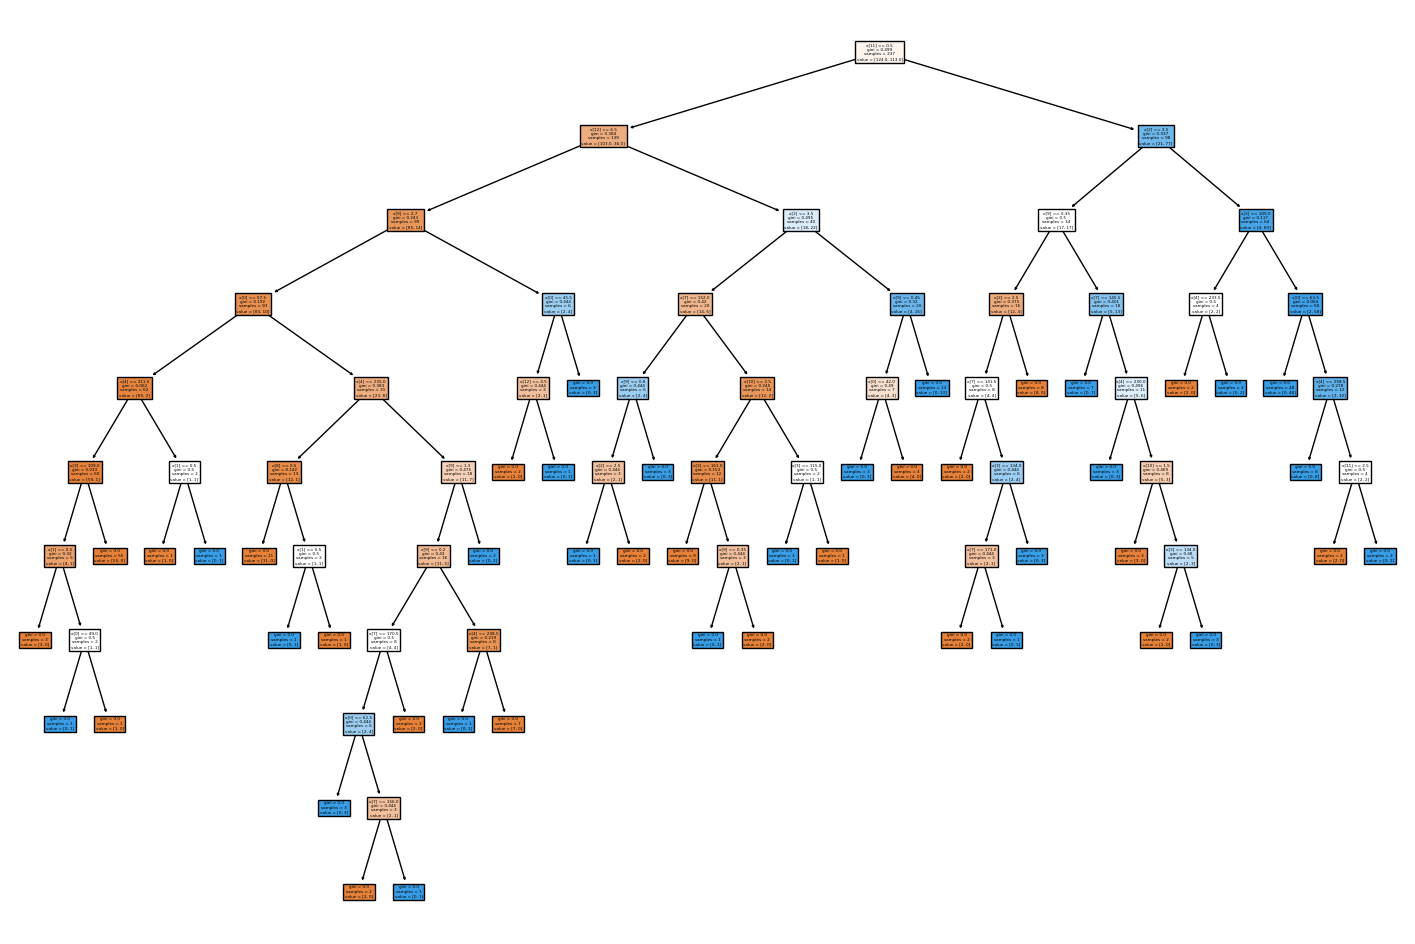

In [56]:
plt.figure(figsize=(18,12))
plot_tree(clt,filled=True)
plt.show()

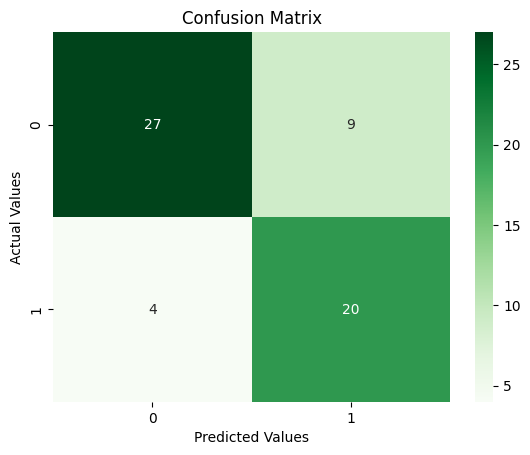

In [62]:
Y_pred = clt.predict(X_test)
confuse_matrix = confusion_matrix(Y_test,Y_pred)
snb.heatmap(confuse_matrix,annot=True,fmt="d",cmap="Greens")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()

[0.83333333 0.54166667 0.625      0.70833333 0.70833333 0.625
 0.58333333 0.73913043 0.82608696 0.73913043]


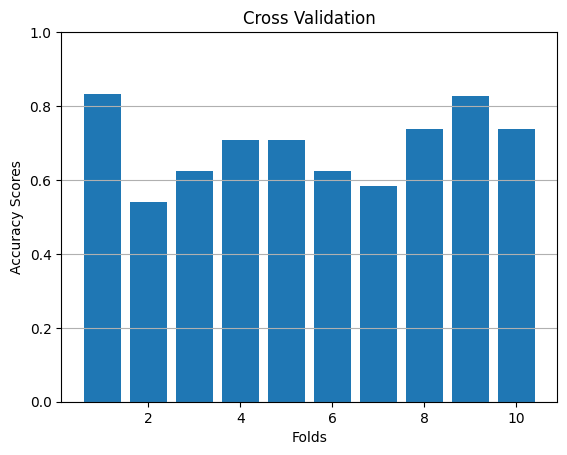

In [68]:
CrossV_scores = cross_val_score(clt,X_train,Y_train,cv=10)
print(CrossV_scores)
plt.bar(np.arange(1,len(CrossV_scores)+1),CrossV_scores)
plt.xlabel("Folds")
plt.ylabel("Accuracy Scores")
plt.title("Cross Validation")
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [69]:
acc = accuracy_score(Y_test,Y_pred)
print(acc)


0.7833333333333333


In [70]:
Report = classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81        36
         1.0       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60

